In [1]:
!pip install vaderSentiment
!pip install scikit-surprise
!pip install folium
!pip install surprise

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2469536 sha256=f2d621a8937ccc56138a50cd37600a45926d5e327fc6c55c8f636883199f1368
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [3]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import warnings

# sklearn ML tools
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RepeatedKFold, train_test_split as sklearn_train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Advanced ML
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMRegressor

# Deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import HeNormal

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Recommendation system
#from surprise import Reader, Dataset, SVD, accuracy, BaselineOnly, SlopeOne
from surprise.model_selection import train_test_split, GridSearchCV, cross_validate

# Utilities
import joblib
import random

# Plotting config
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [65]:
# load the datasets
# load listings
listings_df = pd.read_csv('listings (1).csv.gz', compression='gzip')
listings_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20250613040039,2025-06-13,city scrape,cosy comfortable Irish cottage twin,Our house is a cosy comfortable cottage with ...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,...,4.93,4.68,4.82,NaN,f,2,0,2,0,2.19
1,85156,https://www.airbnb.com/rooms/85156,20250613040039,2025-06-13,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,...,4.89,4.64,4.78,NaN,f,2,0,2,0,2.00
2,159889,https://www.airbnb.com/rooms/159889,20250613040039,2025-06-13,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,...,4.87,4.65,4.71,NaN,f,3,0,3,0,2.79
3,162809,https://www.airbnb.com/rooms/162809,20250613040039,2025-06-13,previous scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,777681,...,4.97,4.78,4.85,NaN,f,2,0,2,0,3.22
4,165828,https://www.airbnb.com/rooms/165828,20250613040039,2025-06-13,city scrape,Pádraig Pearse apt. Kilmainham,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",https://a0.muscache.com/pictures/34311419/b3f6...,790601,...,4.77,4.40,4.56,NaN,f,4,4,0,0,0.51


In [66]:
#drop null
listings_df.dropna(subset=['reviews_per_month'], inplace=True)

In [67]:
# load reviews
reviews_df = pd.read_csv('reviews.csv.gz', compression='gzip')
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,44077,203703,2011-03-20,393348,Christian,We enjoyed our stay very much. The room was co...
1,44077,211369,2011-03-28,444004,Solidea,We have been here 4 nights. Stay in a home is ...
2,44077,234215,2011-04-21,465058,Michael And Isabelle,Teresa and Hughie were great hosts. They were ...
3,44077,261843,2011-05-13,490005,Weston,"No surprises, was as described. Very gracious..."
4,44077,268148,2011-05-17,520460,Barbara,"Teresa was a lovely hostess, and we had a deli..."


In [68]:
reviews_df.dropna(inplace=True)

In [69]:
dublin_merged_df = pd.merge(listings_df, reviews_df, left_on='id', right_on='listing_id')
dublin_merged_df.head(2)

,id_x,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,id_y,date,reviewer_id,reviewer_name,comments
0,44077,https://www.airbnb.com/rooms/44077,20250613040039,2025-06-13,city scrape,cosy comfortable Irish cottage twin,Our house is a cosy comfortable cottage with ...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,...,0,2,0,2.19,44077,203703,2011-03-20,393348,Christian,We enjoyed our stay very much. The room was co...
1,44077,https://www.airbnb.com/rooms/44077,20250613040039,2025-06-13,city scrape,cosy comfortable Irish cottage twin,Our house is a cosy comfortable cottage with ...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,...,0,2,0,2.19,44077,211369,2011-03-28,444004,Solidea,We have been here 4 nights. Stay in a home is ...


In [70]:
# Feature Engineering
# average of the ratings columns to 1 column 'avg_rating'

# columns to average
rating_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                  'review_scores_checkin', 'review_scores_communication',
                  'review_scores_location', 'review_scores_value']

# Create new column 'avg_rating' which is the row-wise mean of the selected columns
dublin_merged_df['avg_rating'] = dublin_merged_df[rating_columns].mean(axis=1)

In [71]:
# drop unnecessary columns in `dublin_merged_df`
columns_to_drop = ['scrape_id', 'last_scraped', 'source', 'host_url', 'host_name','host_location', 'host_about', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
                   'host_has_profile_pic', 'neighbourhood_group_cleansed',
                   'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
                   'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
                   'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews_ltm',
                   'number_of_reviews_l30d', 'license', 'calculated_host_listings_count',
                   'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
                   'reviews_per_month', 'listing_id', 'id_y', 'reviewer_name', 'review_scores_rating', 'review_scores_accuracy',
                   'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

dublin_merged_df = dublin_merged_df.drop(columns=columns_to_drop)

In [72]:
# check remaining columns
dublin_merged_df.columns

Index(['id_x', 'listing_url', 'name', 'description', 'neighborhood_overview',
       'picture_url', 'host_id', 'host_since', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'number_of_reviews', 'availability_eoy', 'number_of_reviews_ly',
       'estimated_occupancy_l365d', 'estimated_revenue_l365d', 'first_review',
       'last_review', 'instant_bookable', 'date', 'reviewer_id', 'comments',
       'avg_rating'],
      dtype='object')

In [73]:
# Example of amenities listed
dublin_merged_df.amenities[:1].values

array(['["Shared patio or balcony", "Refrigerator", "Conditioner", "Wifi", "Private backyard \\u2013 Fully fenced", "Shampoo", "Room-darkening shades", "Body soap", "Hair dryer", "Lock on bedroom door", "Coffee maker", "Oven", "Wine glasses", "Paid dryer \\u2013 In unit", "Toaster", "Books and reading material", "Cleaning products", "Clothing storage: closet", "Bed linens", "Fire extinguisher", "Ethernet connection", "Outdoor dining area", "Smoke alarm", "Hangers", "Smoking allowed", "Outdoor furniture", "First aid kit", "Free street parking", "Single level home", "Bathtub", "Breakfast", "Cooking basics", "Garden view", "Indoor fireplace", "Essentials", "Dining table", "Self check-in", "Central heating", "30 inch HDTV", "Microwave", "Shower gel", "Hot water", "Carbon monoxide alarm", "Lockbox", "Dishwasher", "Iron", "Mini fridge", "Air conditioning", "Private living room", "Paid washer \\u2013 In unit", "Hot water kettle", "Extra pillows and blankets", "Free driveway parking on premise

In [74]:
# Creating a set of all possible amenities
amenities_list = list(dublin_merged_df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'Netflix] [Children\\u2019s books and toys',
 'Long term stays allowed] [Keypad',
 'Dishes and silverware] [Wifi',
 'Dishes and silverware] [Host greets you',
 'Miele  stainless steel double oven',
 'Freezer] [Belling stainless steel double oven',
 'Paid parking garage on premises \\u2013 1 space',
 'Siemens  stainless steel oven',
 'Hangers] [Hot water',
 'Hot water kettle] [High chair',
 'City skyline view] [Conditioner',
 'standard cable] [Refrigerator',
 'Fast wifi \\u2013 388 Mbps',
 'Coffee] [Wifi',
 'Wifi \\u2013 34 Mbps',
 'General body soap',
 'Veries body soap',
 'BBQ grill] [Exercise equipment',
 'Carex shampoo',
 'Microwave] [Shower gel',
 'Body soap] [Exterior security cameras on property',
 'Private backyard \\u2013 Fully fenced] [Dryer',
 'Smoke alarm] [Free washer',
 'Hangers] [Clothing storage',
 'Fast wifi \\u2013 650 Mbps',
 'Dryer',
 'Dedicated workspace',
 'Microwave] [Conditioner',
 'Hot water] [Wifi',
 'Game console: PS4',
 'Hangers] [Paid dryer',
 'Indoor firep

In [75]:
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('TV'), 'tv'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Elevator'), 'elevator'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('parking'), 'parking'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
dublin_merged_df.loc[dublin_merged_df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

In [76]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = dublin_merged_df.iloc[:,41:].columns
dublin_merged_df[cols_to_replace_nulls] = dublin_merged_df[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in dublin_merged_df.iloc[:,41:].columns:
    if dublin_merged_df[col].sum() < len(dublin_merged_df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
dublin_merged_df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
dublin_merged_df.drop('amenities', axis=1, inplace=True)

['air_conditioning', 'bbq', 'gym', 'child_friendly', 'hot_tub_sauna_or_pool', 'secure', 'smoking_allowed', 'accessible', 'event_suitable']


In [77]:
dublin_merged_df.columns[40:]

Index(['high_end_electronics', 'balcony', 'nature_and_views', 'bed_linen',
       'breakfast', 'tv', 'coffee_machine', 'cooking_basics', 'white_goods',
       'elevator', 'parking', 'outdoor_space', 'host_greeting', 'internet',
       'long_term_stays', 'pets_allowed', 'private_entrance', 'self_check_in'],
      dtype='object')

In [78]:
dublin_merged_df.head()

,id_x,listing_url,name,description,neighborhood_overview,picture_url,host_id,host_since,host_response_time,host_response_rate,...,white_goods,elevator,parking,outdoor_space,host_greeting,internet,long_term_stays,pets_allowed,private_entrance,self_check_in
0,44077,https://www.airbnb.com/rooms/44077,cosy comfortable Irish cottage twin,Our house is a cosy comfortable cottage with ...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,2010-08-06,within a few hours,100%,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,44077,https://www.airbnb.com/rooms/44077,cosy comfortable Irish cottage twin,Our house is a cosy comfortable cottage with ...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,2010-08-06,within a few hours,100%,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,44077,https://www.airbnb.com/rooms/44077,cosy comfortable Irish cottage twin,Our house is a cosy comfortable cottage with ...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,2010-08-06,within a few hours,100%,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,44077,https://www.airbnb.com/rooms/44077,cosy comfortable Irish cottage twin,Our house is a cosy comfortable cottage with ...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,2010-08-06,within a few hours,100%,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,44077,https://www.airbnb.com/rooms/44077,cosy comfortable Irish cottage twin,Our house is a cosy comfortable cottage with ...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,2010-08-06,within a few hours,100%,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [79]:
dublin_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310100 entries, 0 to 310099
Data columns (total 58 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id_x                       310100 non-null  int64  
 1   listing_url                310100 non-null  object 
 2   name                       310100 non-null  object 
 3   description                305872 non-null  object 
 4   neighborhood_overview      207249 non-null  object 
 5   picture_url                310100 non-null  object 
 6   host_id                    310100 non-null  int64  
 7   host_since                 309837 non-null  object 
 8   host_response_time         291204 non-null  object 
 9   host_response_rate         291204 non-null  object 
 10  host_is_superhost          300605 non-null  object 
 11  host_listings_count        309837 non-null  float64
 12  host_total_listings_count  309837 non-null  float64
 13  host_verifications         30

In [80]:
columns_to_drop = ['check_in_24h']
dublin_merged_df = dublin_merged_df.drop(columns=columns_to_drop)

In [81]:
dublin_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310100 entries, 0 to 310099
Data columns (total 57 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id_x                       310100 non-null  int64  
 1   listing_url                310100 non-null  object 
 2   name                       310100 non-null  object 
 3   description                305872 non-null  object 
 4   neighborhood_overview      207249 non-null  object 
 5   picture_url                310100 non-null  object 
 6   host_id                    310100 non-null  int64  
 7   host_since                 309837 non-null  object 
 8   host_response_time         291204 non-null  object 
 9   host_response_rate         291204 non-null  object 
 10  host_is_superhost          300605 non-null  object 
 11  host_listings_count        309837 non-null  float64
 12  host_total_listings_count  309837 non-null  float64
 13  host_verifications         30

In [82]:
dublin_merged_df.dropna(inplace=True)

In [83]:
dublin_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174557 entries, 0 to 310083
Data columns (total 57 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id_x                       174557 non-null  int64  
 1   listing_url                174557 non-null  object 
 2   name                       174557 non-null  object 
 3   description                174557 non-null  object 
 4   neighborhood_overview      174557 non-null  object 
 5   picture_url                174557 non-null  object 
 6   host_id                    174557 non-null  int64  
 7   host_since                 174557 non-null  object 
 8   host_response_time         174557 non-null  object 
 9   host_response_rate         174557 non-null  object 
 10  host_is_superhost          174557 non-null  object 
 11  host_listings_count        174557 non-null  float64
 12  host_total_listings_count  174557 non-null  float64
 13  host_verifications         174557 

In [84]:
dublin_merged_df['host_since'] = pd.to_datetime(dublin_merged_df['host_since'])
dublin_merged_df['first_review'] = pd.to_datetime(dublin_merged_df['first_review'])

In [85]:
print(f"Of the Airbnb hosts that are still listing on the site, the first joined on {min(dublin_merged_df.host_since).strftime('%d %B %Y')}, and the most recent joined on {max(dublin_merged_df.host_since).strftime('%d %B %Y')}.")

Of the Airbnb hosts that are still listing on the site, the first joined on 25 November 2009, and the most recent joined on 30 April 2025.


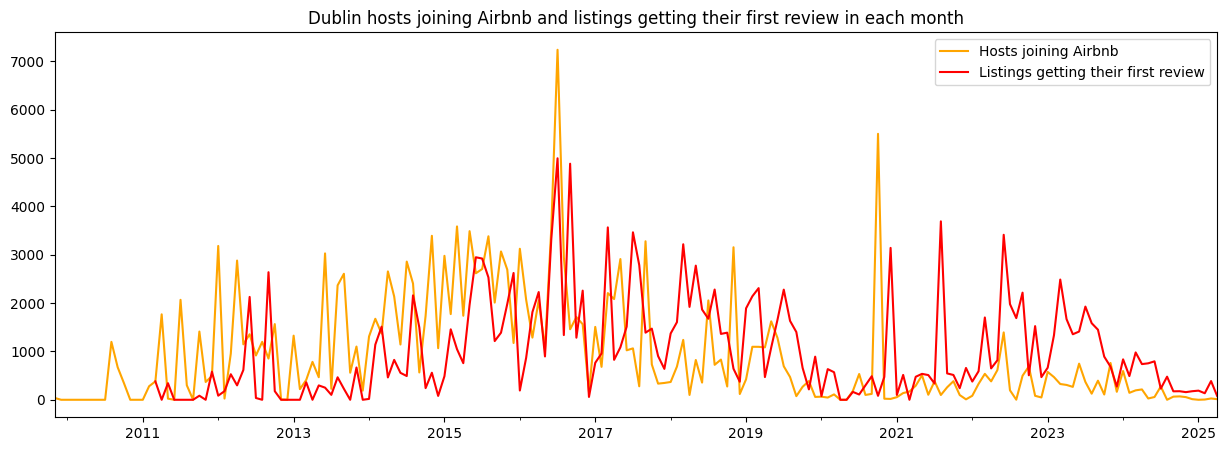

In [86]:
plt.figure(figsize=(15,5))
dublin_merged_df.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='orange')
dublin_merged_df.set_index('first_review').resample('MS').size().plot(label='Listings getting their first review', color='red')
plt.title('Dublin hosts joining Airbnb and listings getting their first review in each month')
plt.legend()
plt.xlim('2009-11-25', '2025-04-30') # Limiting to whole months
plt.xlabel('')
plt.ylabel('')
plt.show()

In [87]:
# Creating dataframes for time series analysis
ts_host_since = pd.DataFrame(dublin_merged_df.set_index('host_since').resample('MS').size())
ts_first_review = pd.DataFrame(dublin_merged_df.set_index('first_review').resample('MS').size())

# Renaming columns
ts_host_since = ts_host_since.rename(columns={0: 'hosts'})
ts_host_since.index.rename('month', inplace=True)
ts_first_review = ts_first_review.rename(columns={0: 'reviews'})
ts_first_review.index.rename('month', inplace=True)

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose_time_series(dublin_merged_df, title=''):
    """
    Plots the original time series and its decomposition into trend, seasonal and residual.
    """
    # Decomposing the time series
    decomposition = seasonal_decompose(dublin_merged_df)

    # Getting the trend, seasonality and noise
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plotting the original time series and the decomposition
    plt.figure(figsize=(12,8))
    plt.suptitle(title, fontsize=14, y=1)
    plt.subplots_adjust(top=0.80)
    plt.subplot(411)
    plt.plot(dublin_merged_df, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')
    plt.tight_layout()

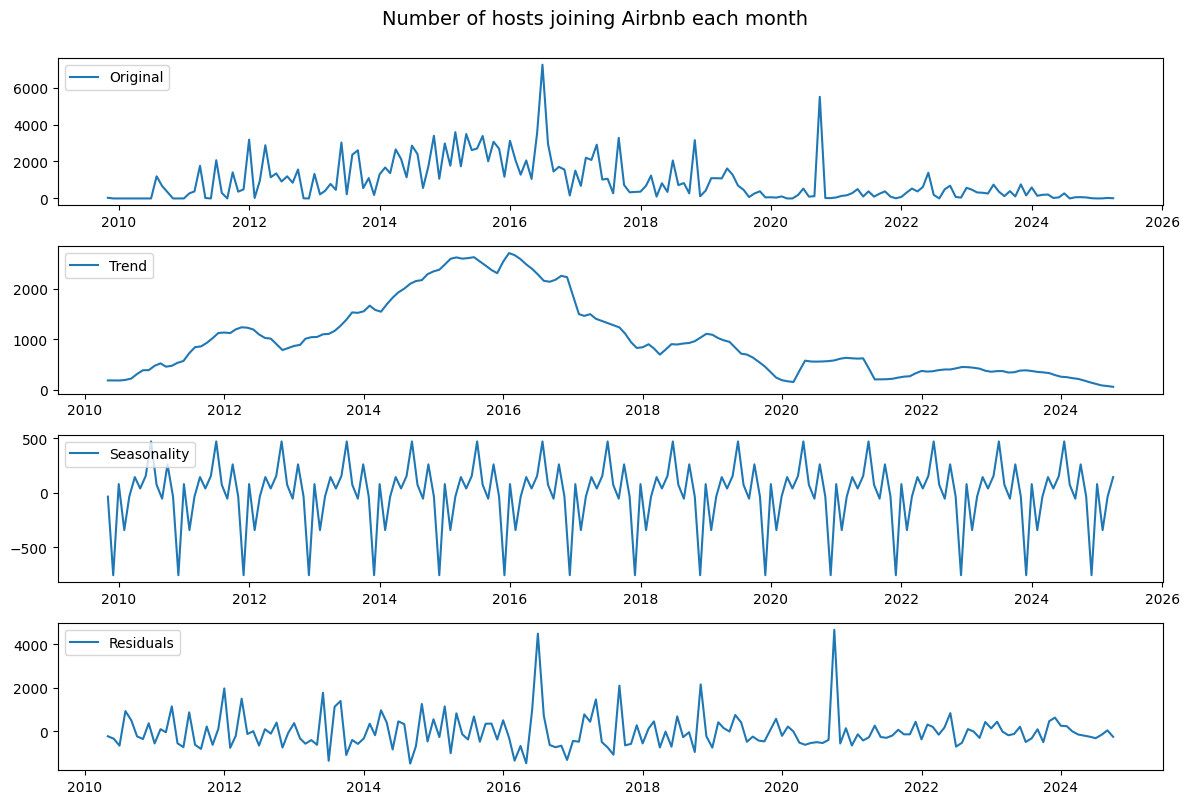

In [91]:
decompose_time_series(ts_host_since, title='Number of hosts joining Airbnb each month')

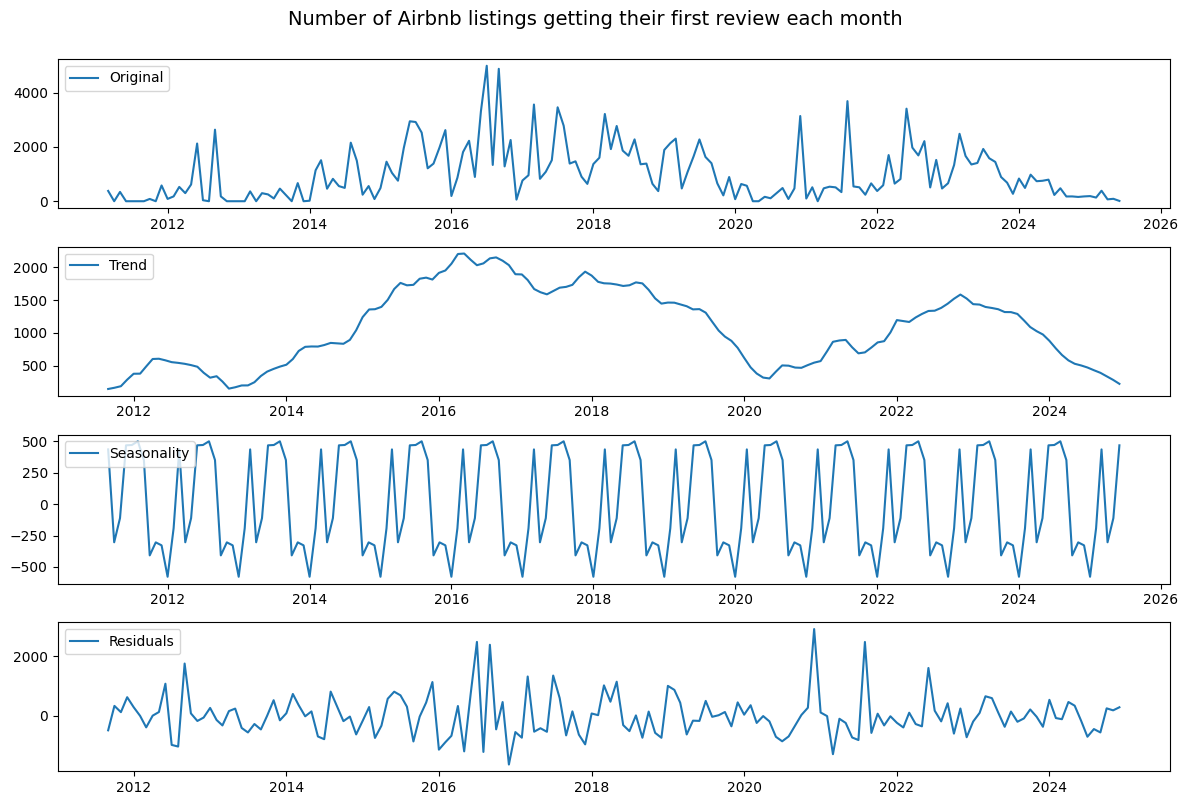

In [92]:
decompose_time_series(ts_first_review, title='Number of Airbnb listings getting their first review each month')

In [93]:
dublin_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174557 entries, 0 to 310083
Data columns (total 57 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id_x                       174557 non-null  int64         
 1   listing_url                174557 non-null  object        
 2   name                       174557 non-null  object        
 3   description                174557 non-null  object        
 4   neighborhood_overview      174557 non-null  object        
 5   picture_url                174557 non-null  object        
 6   host_id                    174557 non-null  int64         
 7   host_since                 174557 non-null  datetime64[ns]
 8   host_response_time         174557 non-null  object        
 9   host_response_rate         174557 non-null  object        
 10  host_is_superhost          174557 non-null  object        
 11  host_listings_count        174557 non-null  float64      

In [94]:
# Remove currency symbols and commas from the 'price' column, then convert to float
dublin_merged_df['price'] = dublin_merged_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'date' to datetime format
dublin_merged_df['date'] = pd.to_datetime(dublin_merged_df['date'])

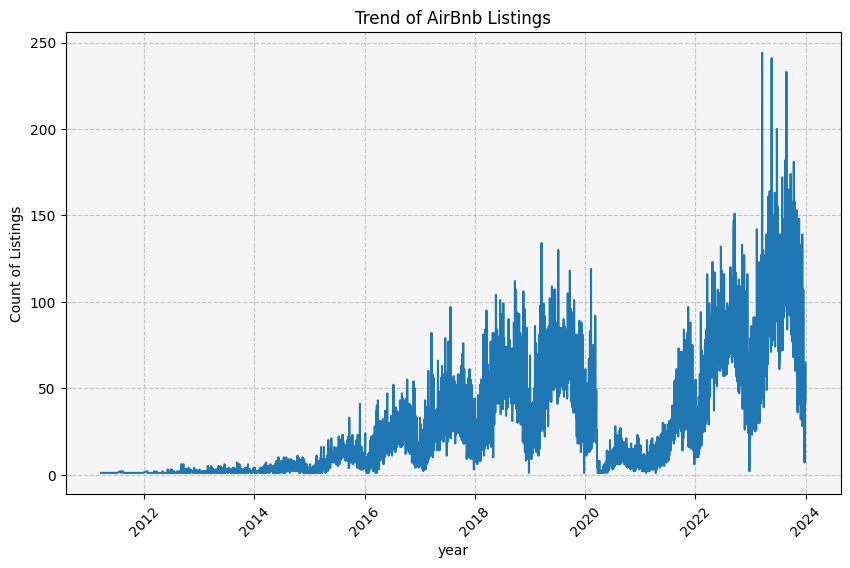

In [95]:
# Count occurrences of each date and sort by index
date_counts = dublin_merged_df['date'].value_counts().sort_index()

# Filter out dates in 2024
date_counts = date_counts[date_counts.index.year < 2024]

# Create line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=date_counts.index, y=date_counts.values)

# Customize the plot background
plt.gca().set_facecolor('#f5f5f5')  # Light grey background
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Add labels and title
plt.xlabel('year')
plt.ylabel('Count of Listings')
plt.title('Trend of AirBnb Listings')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

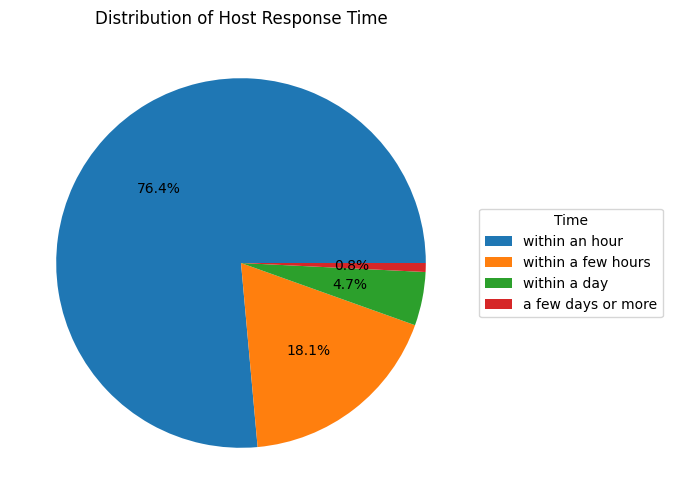

In [96]:
plt.figure(figsize=(10,6))
plt.pie(dublin_merged_df.host_response_time.value_counts(), autopct='%1.1f%%')
plt.title('Distribution of Host Response Time')
plt.legend(labels = dublin_merged_df.host_response_time.value_counts().index, title="Time", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

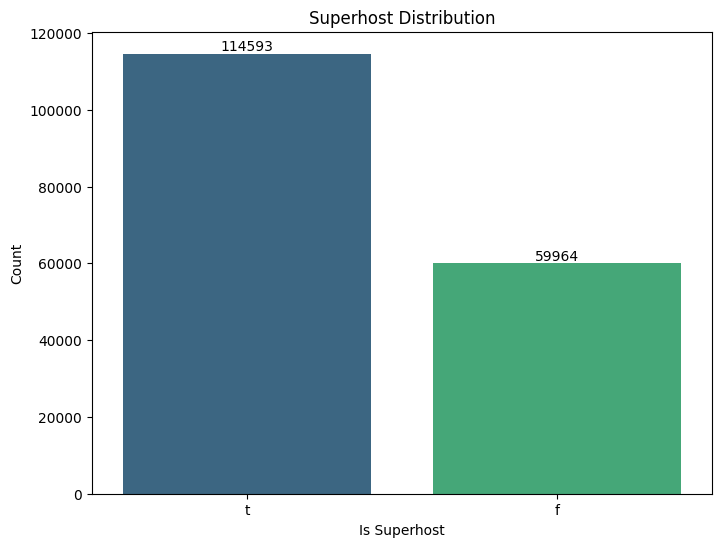

In [97]:
# Create the barplot
plt.figure(figsize=(8,6))

x = dublin_merged_df.host_is_superhost.value_counts().index
y = dublin_merged_df.host_is_superhost.value_counts().values

sns.barplot(x=x, y=y, palette='viridis')

# Add values on top of the bars
for i in range(len(x)):
    plt.text(i, y[i] + 50, str(y[i]), ha='center', va='bottom')

# Add title and labels
plt.title('Superhost Distribution')
plt.ylabel('Count')
plt.xlabel('Is Superhost')

# Display the plot
plt.show()

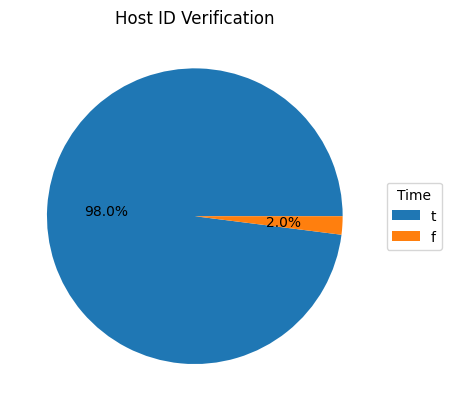

In [98]:
plt.pie(dublin_merged_df.host_identity_verified.value_counts(), autopct='%1.1f%%')
plt.title('Host ID Verification')
plt.legend(labels = dublin_merged_df.host_identity_verified.value_counts().index, title="Time", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

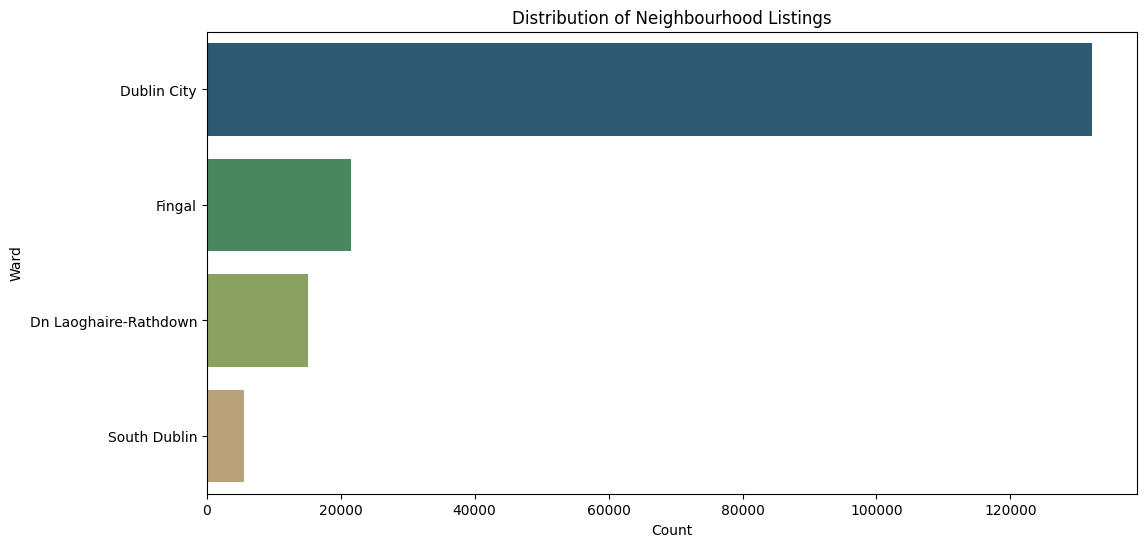

In [99]:
plt.figure(figsize=(12,6))
sns.barplot(x=dublin_merged_df.neighbourhood_cleansed.value_counts().values[:10], y=dublin_merged_df.neighbourhood_cleansed.value_counts().index[:10], palette="gist_earth")
plt.title('Distribution of Neighbourhood Listings')
plt.ylabel('Ward')
plt.xlabel('Count')
plt.show()

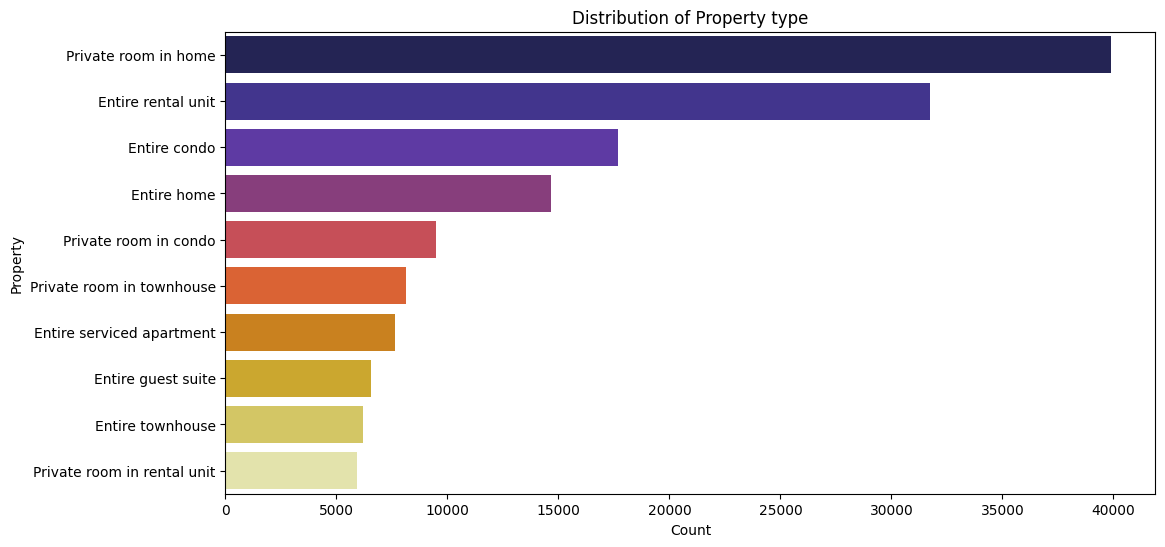

In [100]:
plt.figure(figsize=(12,6))
sns.barplot(x=dublin_merged_df.property_type.value_counts().values[:10], y=dublin_merged_df.property_type.value_counts().index[:10], palette="CMRmap")
plt.title('Distribution of Property type')
plt.ylabel('Property')
plt.xlabel('Count')
plt.show()

In [101]:
def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    dublin_merged_df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

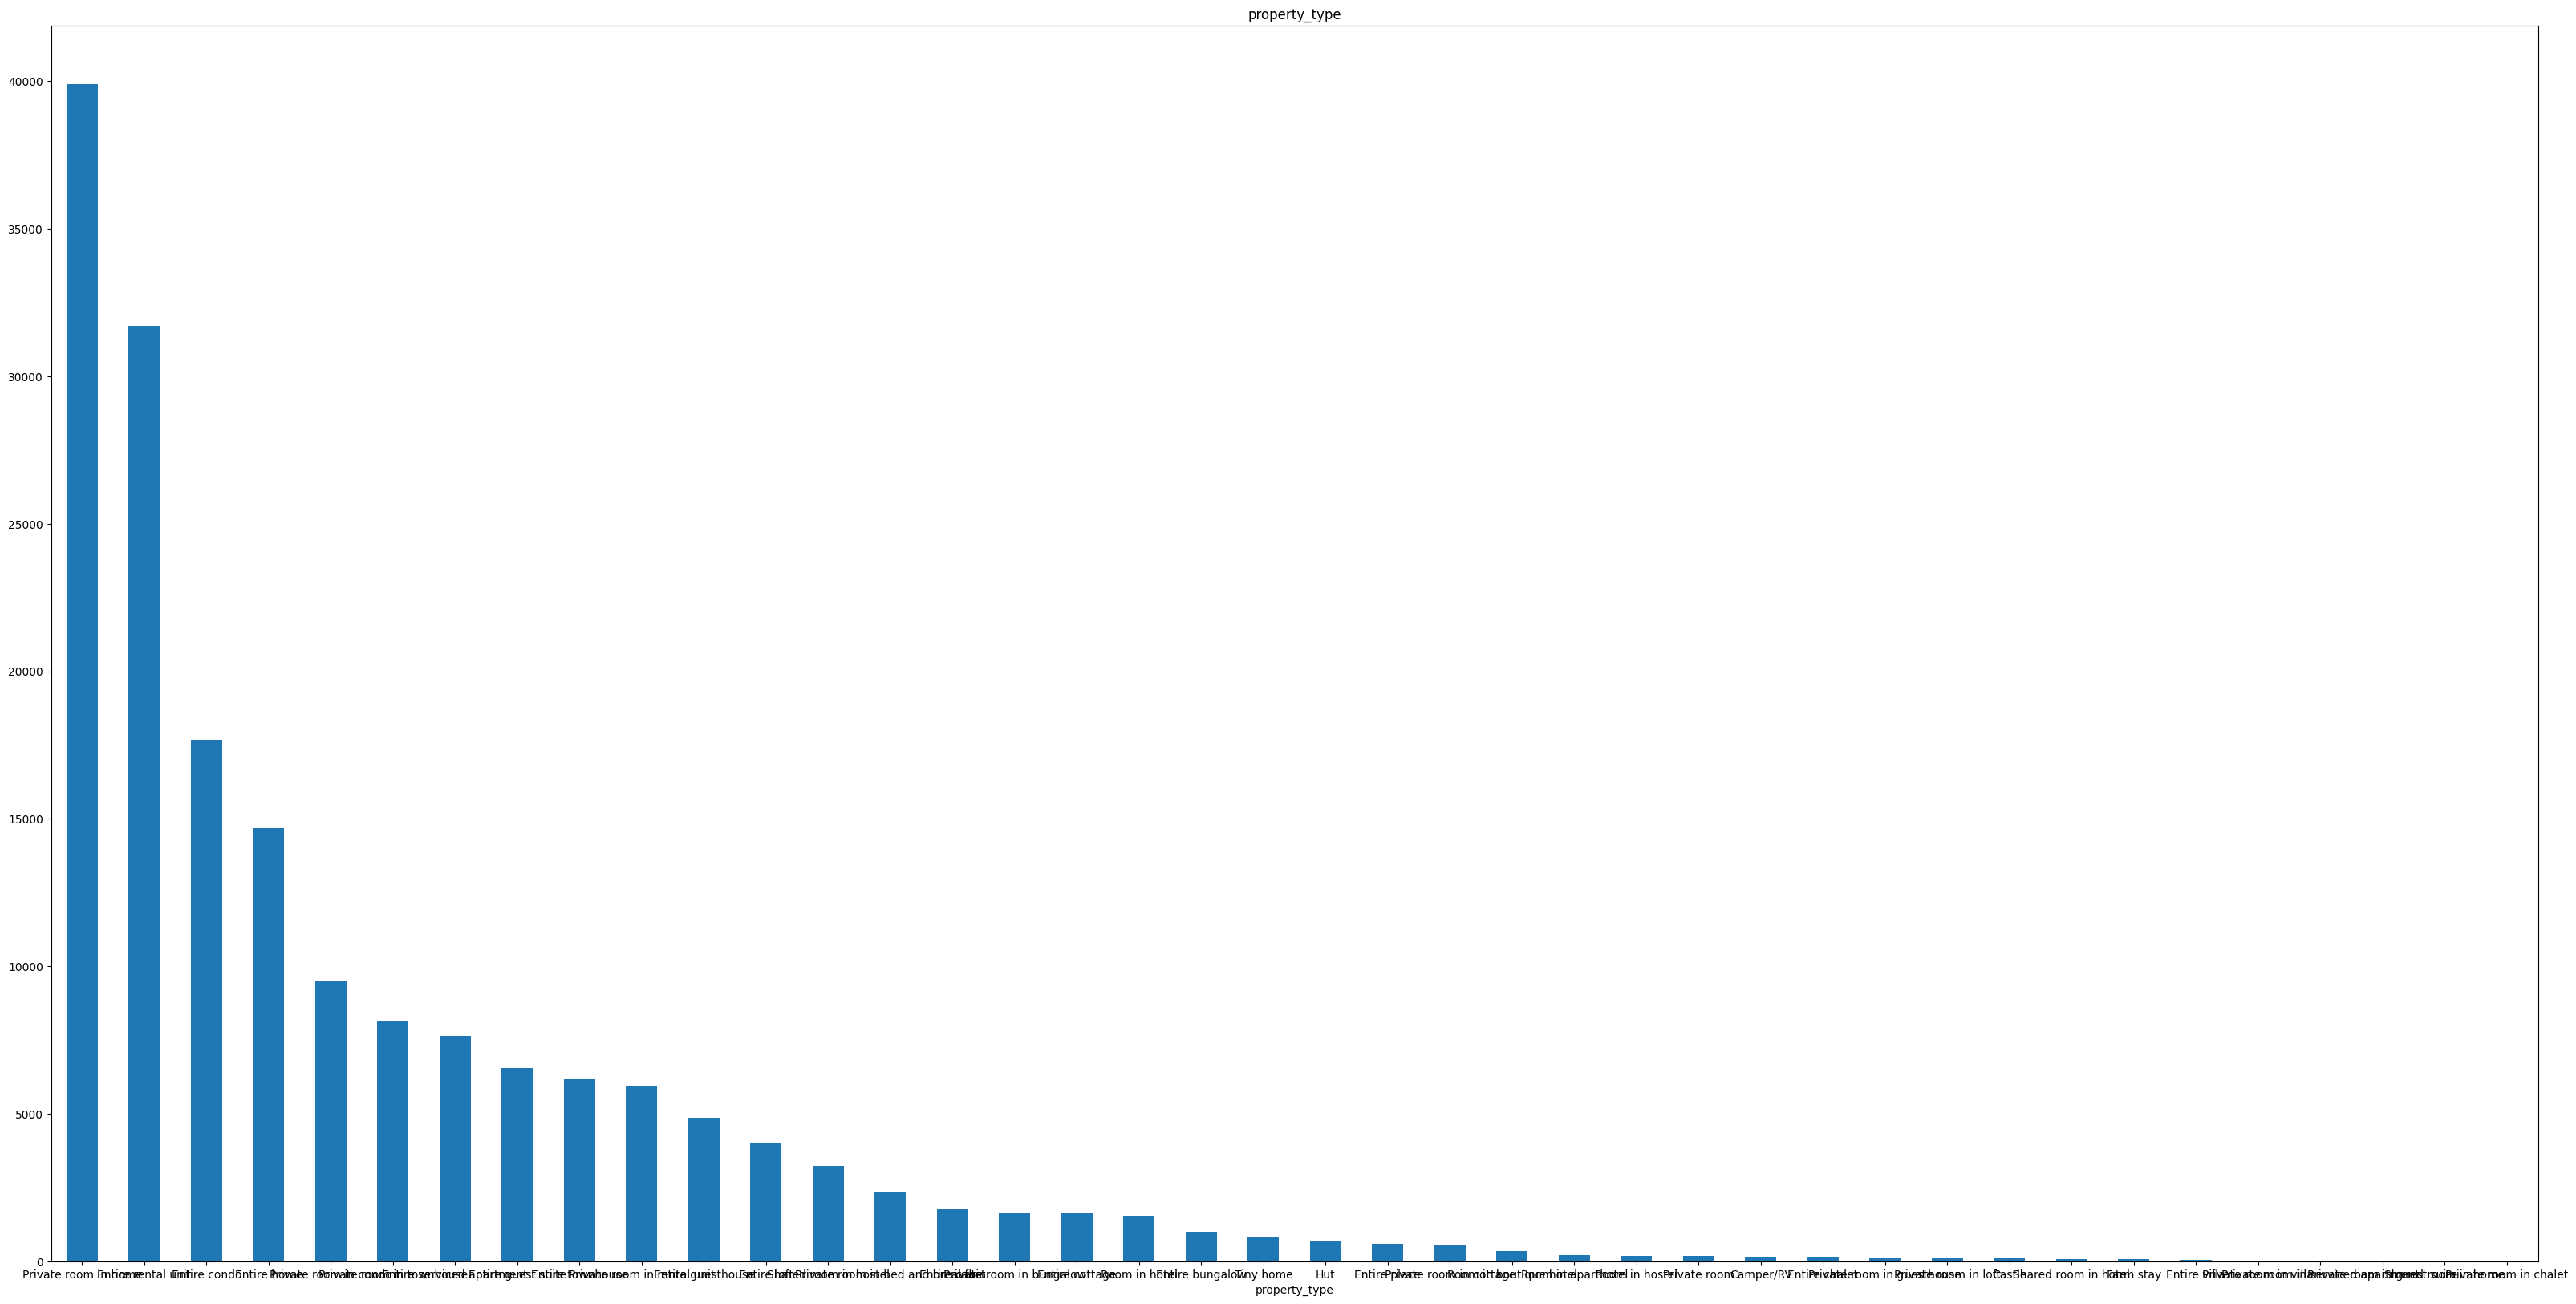

property_type
Private room in home                  0.228567
Entire rental unit                    0.181734
Entire condo                          0.101308
Entire home                           0.084047
Private room in condo                 0.054383
Private room in townhouse             0.046678
Entire serviced apartment             0.043699
Entire guest suite                    0.037535
Entire townhouse                      0.035559
Private room in rental unit           0.034018
Entire guesthouse                     0.027922
Entire loft                           0.023053
Shared room in hostel                 0.018573
Private room in bed and breakfast     0.013463
Entire cabin                          0.010060
Private room in bungalow              0.009435
Entire cottage                        0.009430
Room in hotel                         0.008914
Entire bungalow                       0.005717
Tiny home                             0.004864
Hut                                   0.004073

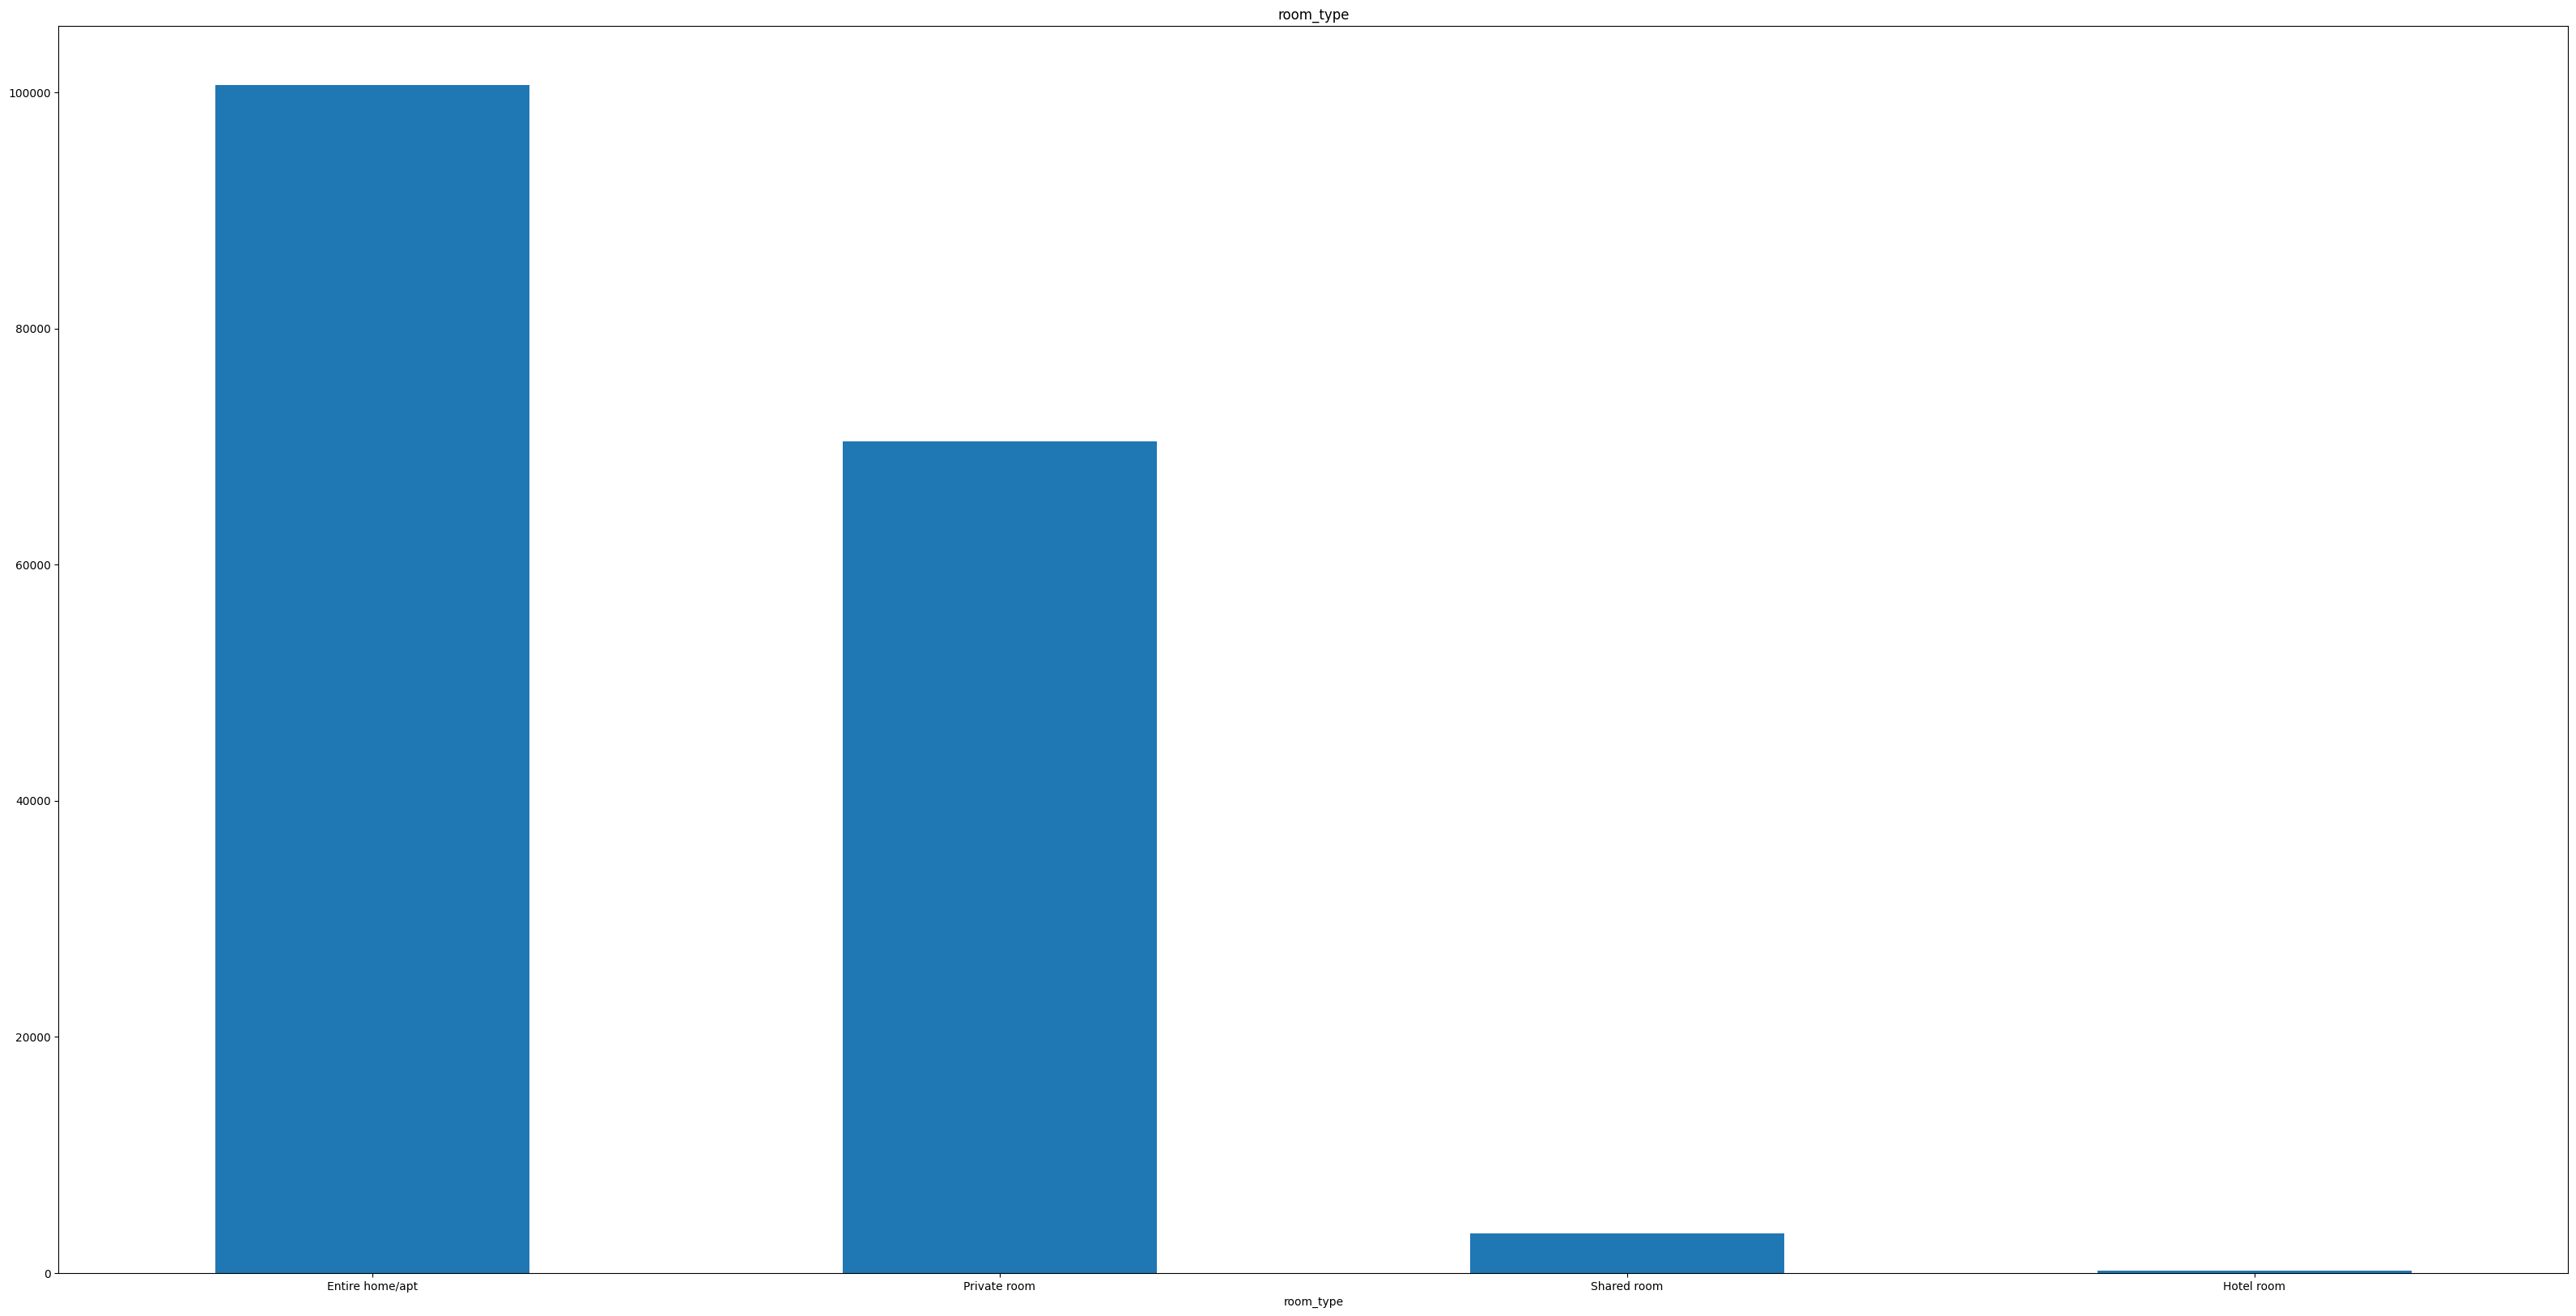

room_type
Entire home/apt    0.576402
Private room       0.403393
Shared room        0.019088
Hotel room         0.001117
Name: proportion, dtype: float64


In [105]:
for col in ['property_type', 'room_type']:
    category_count_plot(col, figsize=(40,20))
    print(dublin_merged_df[col].value_counts(normalize=True))

In [106]:
dublin_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174557 entries, 0 to 310083
Data columns (total 57 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id_x                       174557 non-null  int64         
 1   listing_url                174557 non-null  object        
 2   name                       174557 non-null  object        
 3   description                174557 non-null  object        
 4   neighborhood_overview      174557 non-null  object        
 5   picture_url                174557 non-null  object        
 6   host_id                    174557 non-null  int64         
 7   host_since                 174557 non-null  datetime64[ns]
 8   host_response_time         174557 non-null  object        
 9   host_response_rate         174557 non-null  object        
 10  host_is_superhost          174557 non-null  object        
 11  host_listings_count        174557 non-null  float64      

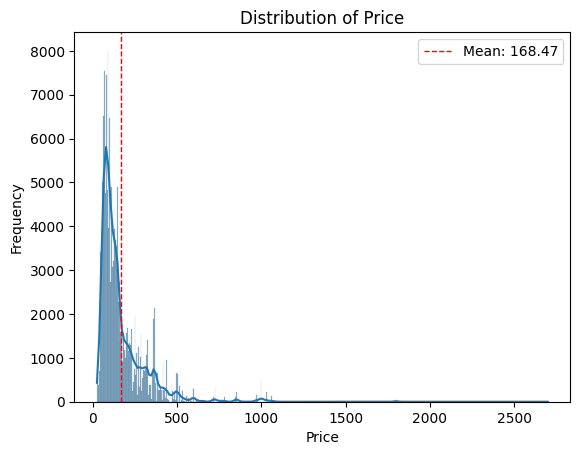

In [107]:
# mean of the 'price' column
mean_value = dublin_merged_df['price'].mean()

# histogram
sns.histplot(dublin_merged_df['price'], kde=True)

# Add a vertical line at the mean
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')

# Add legend and labels
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')

plt.show();

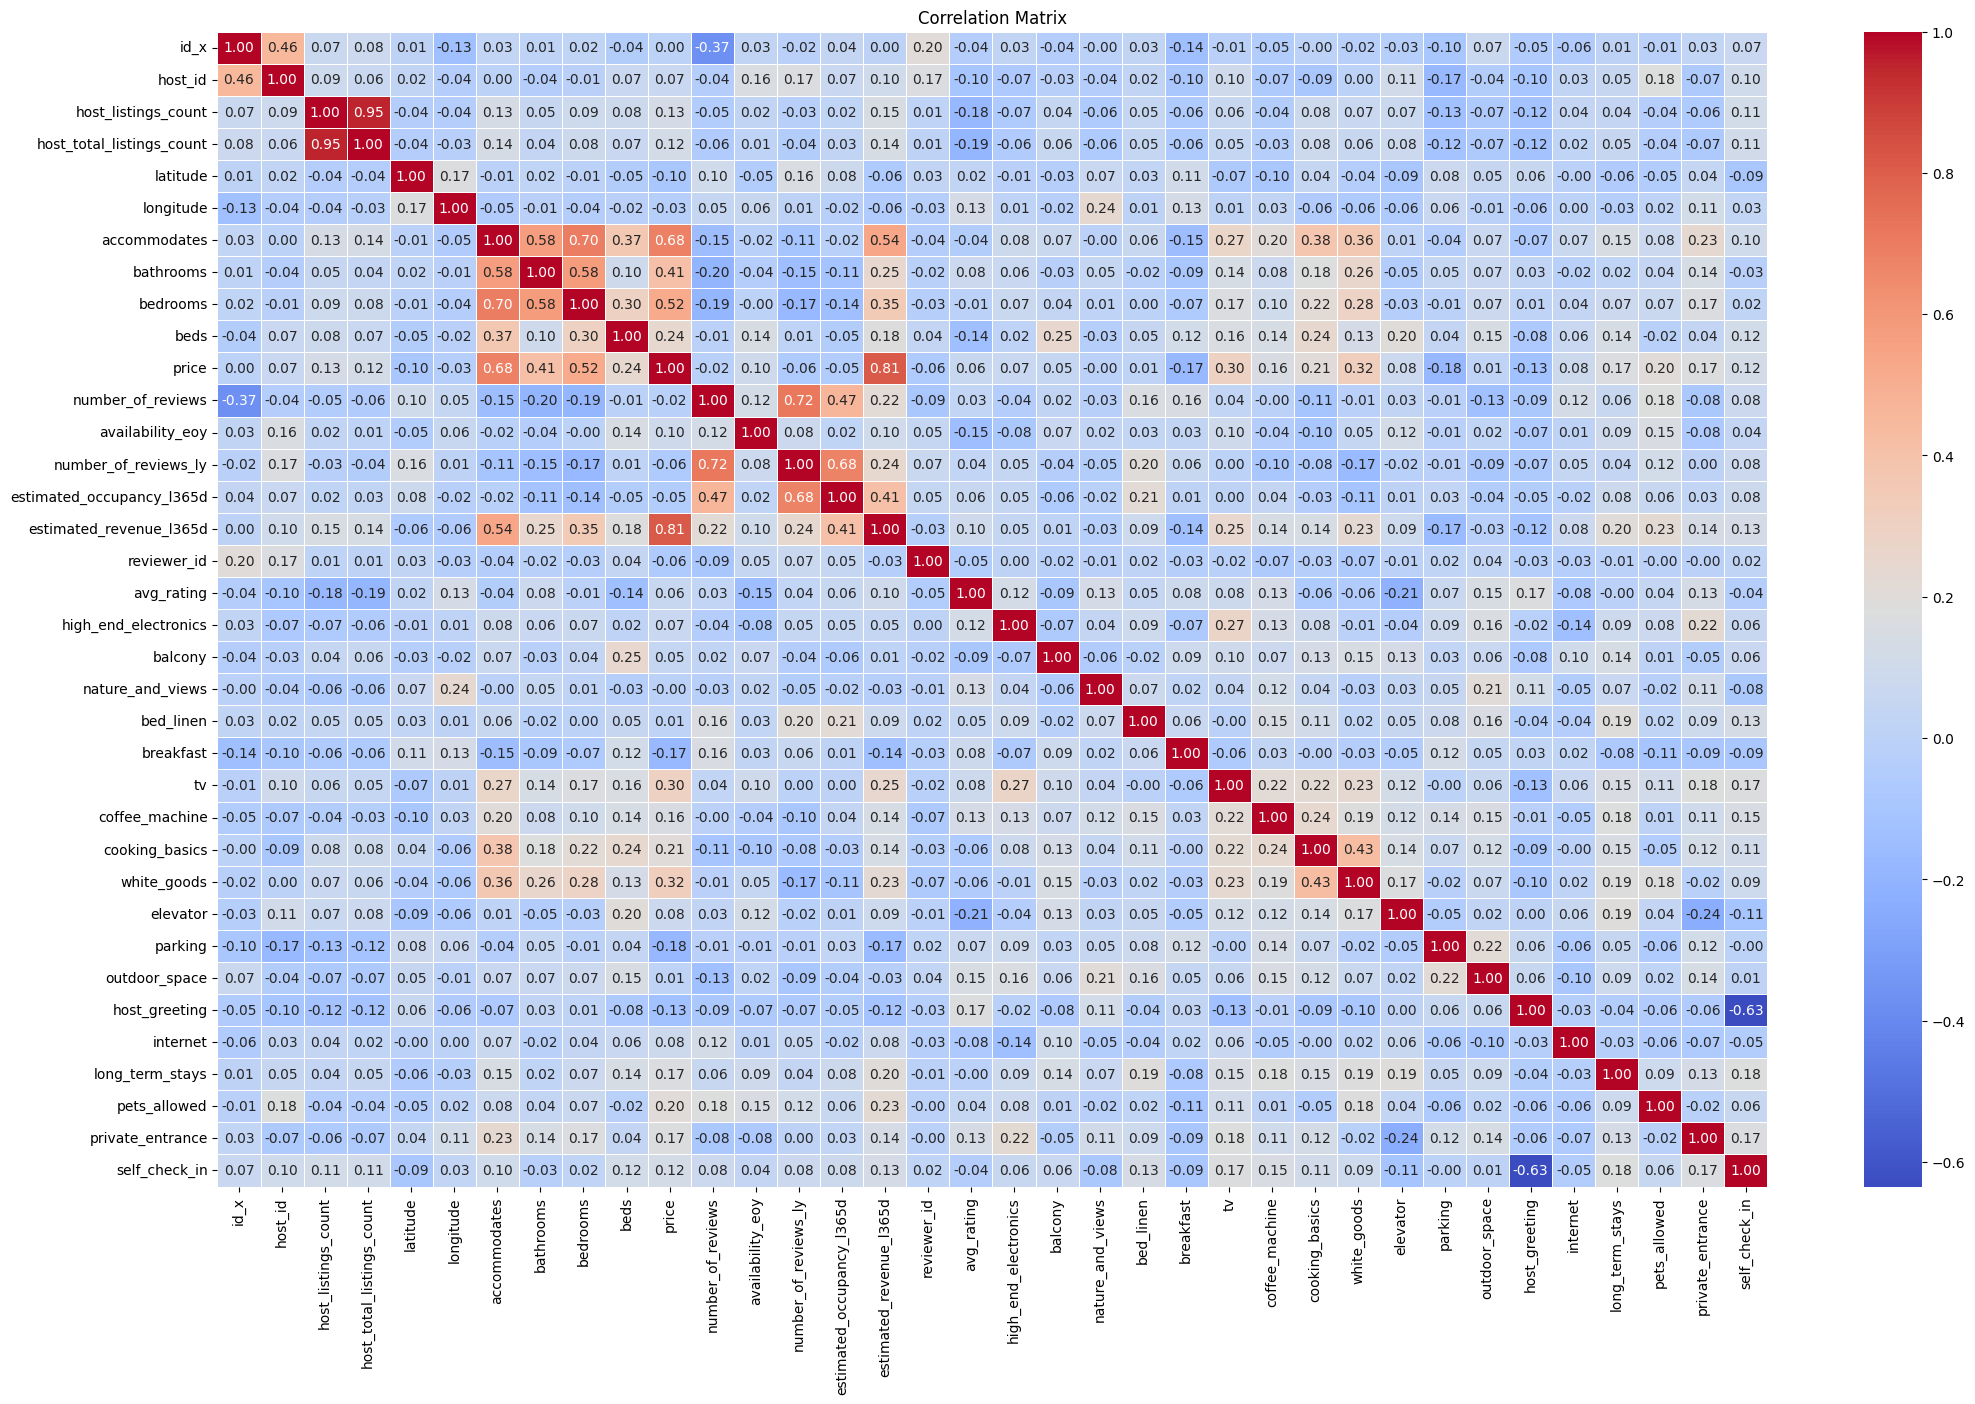

In [108]:
# Filter the dataframe to select only numeric columns
numeric_df = dublin_merged_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

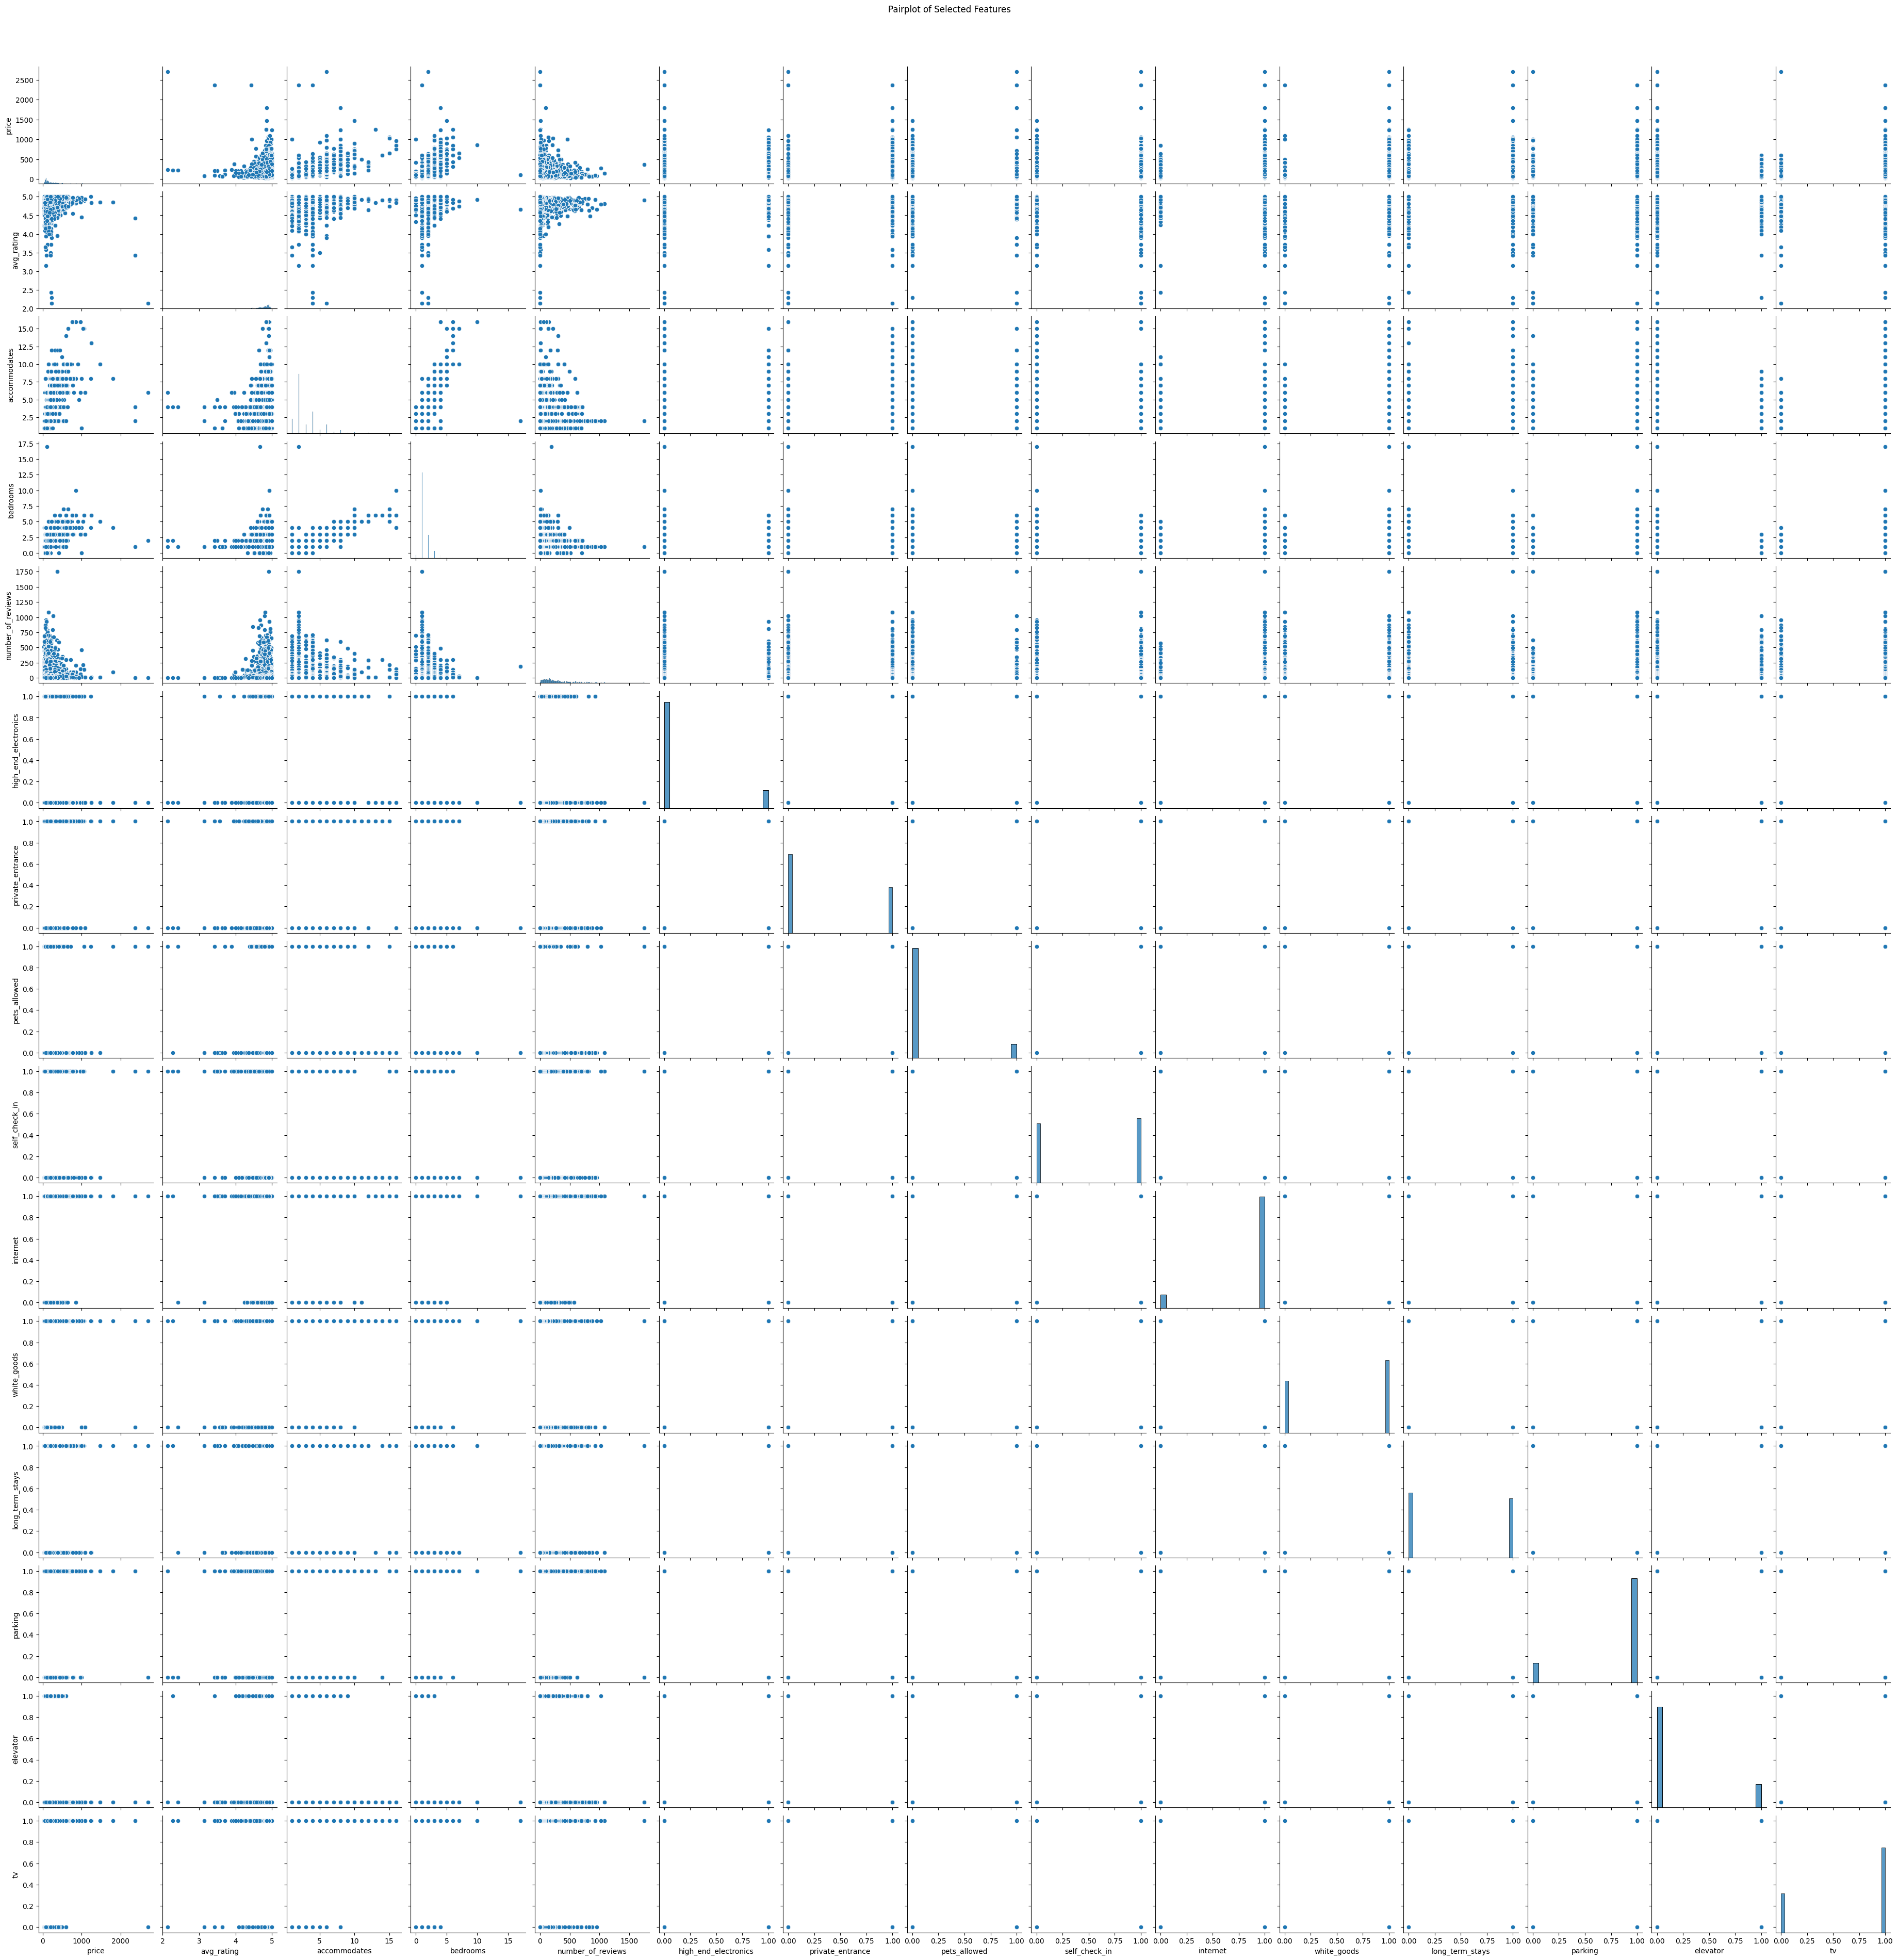

In [110]:
# Selecting a subset of features for pairplot
selected_features = dublin_merged_df[['price', 'avg_rating', 'accommodates', 'bedrooms', 'number_of_reviews', 'high_end_electronics', 'private_entrance', 'pets_allowed', 'self_check_in', 'internet', 'white_goods', 'long_term_stays', 'parking', 'elevator', 'tv']]

# Create pairplot
sns.pairplot(selected_features)
plt.suptitle('Pairplot of Selected Features', y=1.02)  # Adjust the title position
plt.show()